# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [213]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

import pandas as pd

In [215]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [217]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [221]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [222]:
# Extract all rows of data
rows_data = soup.find_all('tr', class_='data-row')
for row in rows_data:
    print(row.text)


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181
2012-09-15
39
171
6
-75.0
751.0


182
2012-09-16
40
17

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [226]:
# Read in HTML tables into a DataFrame
df = pd.read_html(url)
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [292]:
# Create an empty list
mars_weather_list = []

# Loop through the scraped data to create a list of rows
for row in rows_data:
    cell_values = row.find_all("td")
    data_entry = []
    for data in cell_values:
        data_entry.append(data.text)
    mars_weather_list.append(data_entry)
    
mars_weather_list

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [229]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df_mars = pd.DataFrame(mars_weather_list)
#id terrestrial_date   sol   ls  month  min_temp  pressure
df_mars.columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [296]:
# Confirm DataFrame was created successfully
df_mars.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [235]:
df_mars.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [241]:
# Change data types for data analysis
## keep id as object
## change to pd.to_datetime
df_mars.terrestrial_date = pd.to_datetime(df_mars.terrestrial_date, dayfirst=True)
## change to int32
df_mars.sol = df_mars.sol.astype('int32') 
df_mars.ls = df_mars.ls.astype('int32') 
df_mars.month = df_mars.month.astype('int32') 
df_mars.min_temp = df_mars.min_temp.astype('float64') 
df_mars.pressure = df_mars.pressure.astype('float64')
df_mars.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [243]:
# Confirm type changes were successful by examining data types again
df_mars.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [246]:
# 1. How many months are there on Mars?
df_mars['month'].max()

12

In [248]:
# 2. How many sols (Martian days) worth of data are there?
df_mars['sol'].count()

1867

In [250]:
# 3. What is the average minimum temperature by month?
mean_low_temp = df_mars['min_temp'].groupby(df_mars['month']).mean()
mean_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Temperature in Celsius')

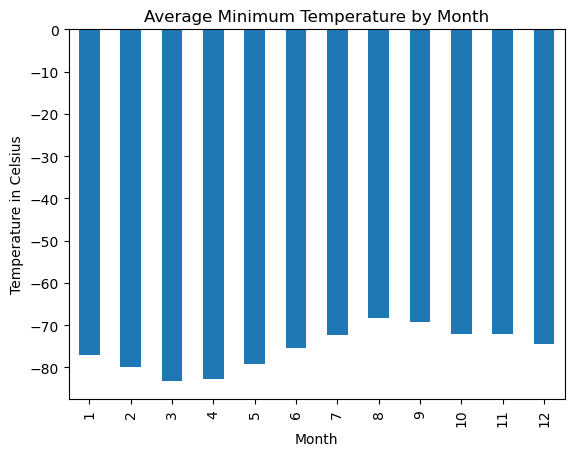

In [252]:
# Plot the average minimum temperature by month
mean_low_temp.plot.bar()
plt.title("Average Minimum Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")

Text(0, 0.5, 'Temperature in Celsius')

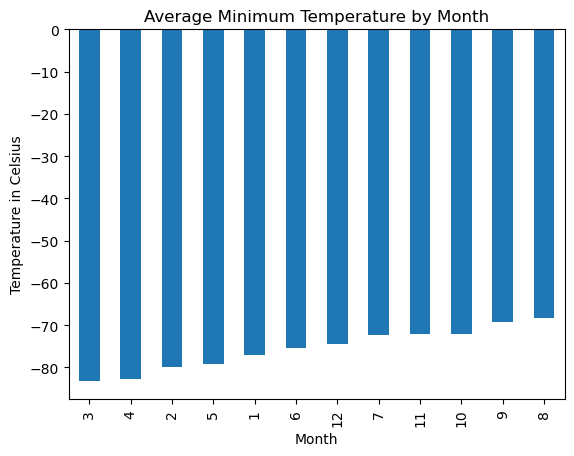

In [258]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_mean_low_temp = mean_low_temp.sort_values()
sorted_mean_low_temp.plot.bar()
plt.title("Average Minimum Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")

In [262]:
# 4. What is the average pressure by month?
mean_pressure = df_mars['pressure'].groupby(df_mars['month']).mean()
mean_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

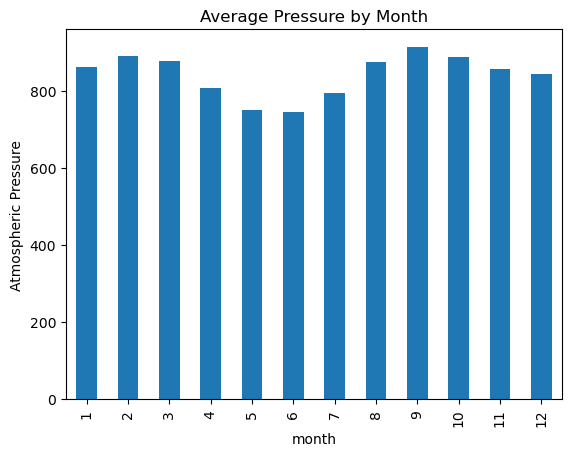

In [18]:
# Plot the average pressure by month
mean_pressure.plot.bar()
plt.title("Average Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")

Text(0, 0.5, 'Atmospheric Pressure')

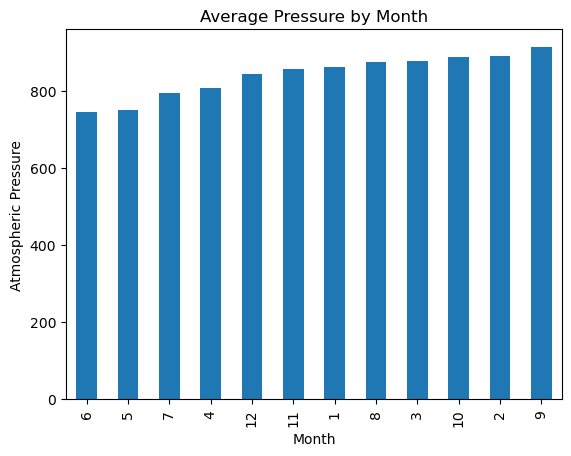

In [266]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_mean_pressure = mean_pressure.sort_values()
sorted_mean_pressure.plot.bar()
plt.title("Average Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")

[Text(0.5, 0, 'Count of Terrestial Days'), Text(0, 0.5, 'Min Temperature')]

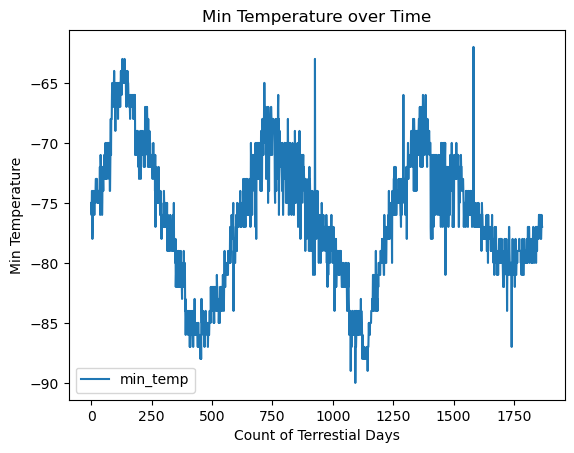

In [320]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation
# in the data set.
# Create a plot that looks at min_temp and the count of terrestial_date (the day count is in the index)
df_mars.plot.line(x='index', y='min_temp', 
    title='Min Temperature over Time').set(
    xlabel='Count of Terrestial Days', 
    ylabel='Min Temperature')

#### Minimum Temperature
The lowest minimum temperatures were observed in martian month 3 followed by 4. The highest minimum temperatures were observed in martian month 8 followed by 9.

#### Atmospheric Pressure

The lowest atmospheric pressures were observed in martian month 6 followed by 5. The highest atmospheric pressures was observed in martian month 9.

#### Year Length
The lowest minimum tempertures occur at approximately 450 and 1125 terrestial days, estimating one year is approximately 675 days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
output_path = "mars_data.csv"
df_mars.to_csv(output_path)

In [22]:
browser.quit()